# Geospace Packages in Resen
This tutorial is a brief introduction to the some of the packages included in Resen that are particularly useful for geospace research.  Many of these packages have been developed by members of the geospace community to help users access data, models, and toolkits.  These packages can be very powerful and often included functionality to do a wide variety of things.  Rather than attempt to cover every feature of every package in Resen, this tutorial will introduce the general purpose and useage of each package and direct you to resources from the package developers for full documentation of the funcitonality.

## Apexpy
Apexpy is python wrapper for the Apex fortran library, which allows for converting between geodetic and magnetic apex coordinates.  The Apex fortran library uses a spherical harmonics fit to IGRF, so coordinate conversions can be performed quickly without field-line tracing.

[Documentation](https://apexpy.readthedocs.io/en/latest/index.html)
[Source Code](https://github.com/aburrell/apexpy)

In [1]:
>>> from apexpy import Apex
>>> from __future__ import print_function
>>> A = Apex(date=2015.3)  # datetime objects are also supported
>>> # geo to apex, scalar input
>>> mlat, mlon = A.convert(60, 15, 'geo', 'apex', height=300)
>>> print("{:.12f}, {:.12f}".format(mlat, mlon))
57.469573974609, 93.633583068848
>>> # apex to geo, array input
>>> glat, glon = A.convert([90, -90], 0, 'apex', 'geo', height=0)
>>> print(["{:.12f}, {:.12f}".format(ll, glon[i]) for i,ll in enumerate(glat)])
['83.099594116211, -84.594589233398', '-74.388267517090, 125.714927673340']
>>> # geo to MLT
>>> import datetime as dt
>>> mlat, mlt = A.convert(60, 15, 'geo', 'mlt', datetime=dt.datetime(2015, 2, 10, 18, 0, 0))
>>> print("{:.12f}, {:.12f}".format(mlat, mlt))
56.590423583984, 19.108103879293
>>> # can also convert magnetic longitude to mlt
>>> mlt = A.mlon2mlt(120, dt.datetime(2015, 2, 10, 18, 0, 0))
>>> print("{:.2f}".format(mlt))
20.89


SyntaxError: from __future__ imports must occur at the beginning of the file (<ipython-input-1-cb8e70d15bc0>, line 5)

## Basemap
The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python.  Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to one of 25 different map projections (using the PROJ.4 C library). Matplotlib is then used to plot contours, images, vectors, lines or points in the transformed coordinates. Shoreline, river and political boundary datasets (from Generic Mapping Tools) are provided, along with methods for plotting them. The GEOS library is used internally to clip the coastline and polticial boundary features to the desired map projection region.

**Note:** Basemap is being replaced with cartopy and will be depricated by 2020.  Whenever possible, use the cartopy package rather than basemap.

[Documentation](https://matplotlib.org/basemap/)
[Tutorials](https://basemaptutorial.readthedocs.io/en/latest/)
[Source Code](https://github.com/matplotlib/basemap)

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap()

map.drawcoastlines()

plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

## Bokeh
Bokeh is an interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of versatile graphics, and to extend this capability with high-performance interactivity over very large or streaming datasets. 

[Documentation](https://bokeh.pydata.org/en/latest/)
[Gallery](https://bokeh.pydata.org/en/latest/docs/gallery.html#gallery)
[Source Code](https://github.com/bokeh/bokeh)

In [3]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

ModuleNotFoundError: No module named 'bokeh'

## Cartopy
Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.  Cartopy makes use of the powerful PROJ.4, NumPy and Shapely libraries and includes a programmatic interface built on top of Matplotlib for the creation of publication quality maps.

[Documentation](https://scitools.org.uk/cartopy/docs/latest/)
[Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html)
[Source Code](https://github.com/SciTools/cartopy)

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()


## DaViTpy
DaViTpy (Data Visualization Toolkit) helps you access and visualize SuperDARN (Super Dual Auroral Radar Network) data.  [SuperDARN](http://vt.superdarn.org/tiki-index.php) consists of over 30 ground-based HF ionospheric radars that measure plasma characteristics throughout large portions of both the northern and southern hemispheres.

[Documentation](http://davit.ece.vt.edu/davitpy/#)
[Source Code](https://github.com/vtsuperdarn/davitpy)
[Tutorials](https://github.com/vtsuperdarn/davitpy/tree/master/docs/notebook)

## h5py
The h5py package is a Pythonic interface to the [HDF5](https://www.hdfgroup.org/solutions/hdf5/) binary data format.  It lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. HDF5 files are an increasingly common way to store scientific data and metadata, especially when data sets are large, complex, or multidimentional

[Documentation](http://docs.h5py.org/en/stable/index.html)
[Source Code](https://github.com/h5py/h5py)

## Ipython
[IPython](https://ipython.org/) provides a rich architecture for interactive computing with:
- A powerful interactive shell.
- A kernel for Jupyter.
- Support for interactive data visualization and use of GUI toolkits.
- Flexible, embeddable interpreters to load into your own projects.
- Easy to use, high performance tools for parallel computing.

[Documentation](https://ipython.readthedocs.io/en/stable/)
[Gallery](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
[Source Code](https://github.com/ipython/ipython)

## MadrigalWeb
MadrigalWeb is a package that lets you write scripts to interact with the CEDAR Madrigal Database.  It lets you query the database, discover which data are available, and download data files. 

[Documentation](http://cedar.openmadrigal.org/docs/name/rr_python.html)
[Examples](http://cedar.openmadrigal.org/docs/name/rt_python.html)

In [5]:
import madrigalWeb.madrigalWeb

# constants
user_fullname = 'Bill Rideout - automated test'
user_email = 'brideout@haystack.mit.edu'
user_affiliation = 'MIT Haystack'

madrigalUrl = 'http://madrigal.haystack.mit.edu/madrigal'


testData = madrigalWeb.madrigalWeb.MadrigalData(madrigalUrl)



print 'Example of call to getAllInstruments'
instList = testData.getAllInstruments()
# print out Millstone
for inst in instList:
    if inst.code == 30:
        print (str(inst) + '\n')
        

print 'Example of call to getExperiments'
expList = testData.getExperiments(30, 1998,1,19,0,0,0,1998,1,22,0,0,0)
for exp in expList:
    # should be only one
    print (str(exp) + '\n')


print 'Example of call to getExperimentFiles'
fileList = testData.getExperimentFiles(expList[0].id)
for thisFile in fileList:
    if thisFile.category == 1:
        print (str(thisFile.name) + '\n')
        thisFilename = thisFile.name
        break
    
print 'Example of downloadFile - simple and hdf5 formats:'
result = testData.downloadFile(thisFilename, "/tmp/test.txt", 
                               user_fullname, user_email, user_affiliation, "simple")
result = testData.downloadFile(thisFilename, "/tmp/test.hdf5", 
                               user_fullname, user_email, user_affiliation, "simple")

print 'Example of simplePrint - only first 1000 characters printed'
result = testData.simplePrint(thisFilename, user_fullname, user_email, user_affiliation)
print result[:1000]
print

print 'Example of call to getExperimentFileParameters - only first 10 printed'
fileParms = testData.getExperimentFileParameters(thisFilename)
for i in range(10):
    print fileParms[i]
print


print 'Example of call to isprint (prints data)'
print(testData.isprint(thisFilename,
                       'gdalt,ti',
                       'filter=gdalt,500,600 filter=ti,1900,2000',
                       user_fullname, user_email, user_affiliation))


print 'Example of call to madCalculator (gets derived data at any time)'
result = testData.madCalculator(1999,2,15,12,30,0,45,55,5,-170,-150,10,200,200,0,'sdwht,kp')
for line in result:
    for value in line:
        print ('%8.2e ' % (value))
    print('\n')

print 'Example of searching all Madrigal sites for an experiment - here we search for PFISR data'
expList = testData.getExperiments(61,2008,4,1,0,0,0,2008,4,30,0,0,0,local=0)
print expList[0]

print 'Since this experiment is not local (note the experiment id = -1), we need to create a new MadrigalData object to get it'
testData2 = madrigalWeb.madrigalWeb.MadrigalData(expList[0].madrigalUrl)

print 'Now repeat the same calls as above to get PFISR data from the SRI site'
expList2 = testData2.getExperiments(61,2008,4,1,0,0,0,2008,4,30,0,0,0,local=1)
print 'This is a PFISR experiment'
print expList2[0]



SyntaxError: Missing parentheses in call to 'print'. Did you mean print('Example of call to getAllInstruments')? (<ipython-input-5-da2de5dd4168>, line 15)

## Mangopy
Mangopy is a package for acessing and visualizing ASI data from the MANGO (Midlatitude Allsky-imaging Network for GeoSpace Observations) Network.  [MANGO](http://mango.sri.com/en/) consists of several red-line imagers throughout the contental United States.

[Source Code](https://github.com/astib/MANGO)
[Tutorial](https://github.com/astib/MANGO/blob/master/mangopy_tutorial.ipynb)

No data directory has been specified!  If data is downloaded, it will be saved to /var/folders/yf/c17s54f12c1bg0cxdywsxyxjssh4z4/T/MANGOData.  This is also where mangopy will look for existing data files.
Attempting to download CApr1016.h5 from FTP server.
Sucessfully downloaded CApr1016.h5


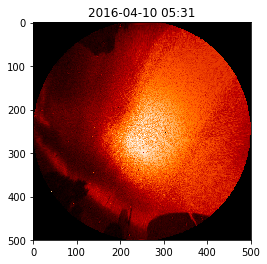

In [6]:
from mangopy import Mango


man = Mango()

site = man.get_site_info('Capitol Reef Field Station')
import datetime as dt
time0 = dt.datetime(2016,4,10,5,30)
man.plot(site,time0)



## Matplotlib
Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

[Documentation](https://matplotlib.org/)
[Gallery](https://matplotlib.org/gallery/index.html)
[Source Code](https://github.com/matplotlib/matplotlib)

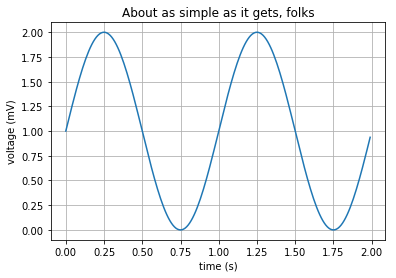

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()


## NetCDF4
Netcdf4-python is a Python interface to the netCDF C library.  [NetCDF](https://www.unidata.ucar.edu/software/netcdf/docs/netcdf_introduction.html) is a common file format typically used for storing large, multi-dimensional arrays of scientific data.

[Documentation](https://unidata.github.io/netcdf4-python/netCDF4/index.html)
[Source Code](https://github.com/Unidata/netcdf4-python)

## NumPy
NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities
Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

**Note:** The numpy library is powerful, extensive, and well documented.  Rather than attempting to read the full documentation before you get started with numpy, it may be easier to find exactly what you're looking for through search engines as you need it!

[Documentation](https://numpy.org/devdocs/)
[Quickstart Tutorial](https://numpy.org/devdocs/user/quickstart.html)
[Source Code](https://github.com/numpy/numpy)

In [8]:
>>> import numpy as np
>>> a = np.arange(15).reshape(3, 5)
>>> a
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])
>>> a.shape
(3, 5)
>>> a.ndim
2
>>> a.dtype.name
'int64'
>>> a.itemsize
8
>>> a.size
15
>>> type(a)
<type 'numpy.ndarray'>
>>> b = np.array([6, 7, 8])
>>> b
array([6, 7, 8])
>>> type(b)
<type 'numpy.ndarray'>


SyntaxError: invalid syntax (<ipython-input-8-0668e318775a>, line 18)

## Pandas
[Pandas (Python Data Analysis Library)](https://pandas.pydata.org/) provides high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

[Documentation](https://pandas.pydata.org/pandas-docs/stable/)
[Tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
[Source Code](https://github.com/pandas-dev/pandas)

## Pyglow
pyglow is a Python module that wraps several upper atmosphere climatological models written in FORTRAN, such as the Horizontal Wind Model (HWM), the International Geomagnetic Reference Field (IGRF), the International Reference Ionosphere (IRI), and the Mass Spectrometer and Incoherent Scatter Radar (MSIS). Pyglow offers access to a variety of models and geophysical indices in a convenient, high-level object-oriented interface within Python.

[Examples](https://github.com/timduly4/pyglow/tree/master/examples)
[Source Code](https://github.com/timduly4/pyglow)

In [9]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

import pyglow

# Inputs:
lat = 40.
lon = -80.
alt = 250.
alts = np.linspace(100., 500., 101)
dn = datetime(2015, 3, 23, 15, 30)

ne_2012 = []
ne_2016 = []

# Calculate for both IRI model year 2012 and 2016:
for alt in alts:
    print("Computing alt=%3.1f km..." % (alt))
    pt = pyglow.Point(dn, lat, lon, alt)

    pt.run_iri()  # default year is 2016
    ne_2016.append(pt.ne)

    pt.run_iri(version=2012)  # Can revert back to 2012 model, if necessary.
    ne_2012.append(pt.ne)

# Plot
plt.figure(1)
plt.clf()
plt.semilogx(ne_2016, alts, 'bo-', label='IRI Model Year: 2016')
plt.semilogx(ne_2012, alts, 'r.--', label='IRI Model Year: 2012')
plt.grid()
plt.xlabel(r'$n_e$ [cm$^{-3}$]')
plt.ylabel('Altitude [km]')
plt.title(r'%s UT, lat=%3.1f$^\circ$, lon=%3.1f$^\circ$' %
          (dn.strftime('%Y-%m-%d %H:%M:%S'), lat, lon))
plt.legend(loc=0)
plt.draw()
plt.show()

ModuleNotFoundError: No module named 'pyglow'

## PyMongo
PyMongo is a Python distribution containing tools for working with [MongoDB](https://www.mongodb.com/), and is the recommended way to work with MongoDB from Python.

[Documentation](https://api.mongodb.com/python/current/)
[Tutorials](https://api.mongodb.com/python/current/tutorial.html)
[Source Code](https://github.com/mongodb/mongo-python-driver)

## SciPy
The [SciPy library](https://www.scipy.org/scipylib/index.html) is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration, interpolation, optimization, linear algebra and statistics.

[Documentation](https://docs.scipy.org/doc/scipy/reference/)
[Tutorials](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html)
[Source Code](https://github.com/scipy/scipy/)

## Sciunit
Sciunits are efficient, lightweight, self-contained packages of computational experiments that can be guaranteed to repeat or reproduce regardless of deployment issues. Sciunit answers the call for a reusable research object that containerizes and stores applications simply and efficiently, facilitates sharing and collaboration, and eases the task of executing, understanding, and building on shared work. 

[Documentation](https://sciunit.run/docs/)
[Source Code](https://bitbucket.org/geotrust/sciunit2/src/master/)

## SGP4
SGP4 computes the position and velocity of an earth-orbiting satellite, given the satellite’s TLE orbital elements from a source like Celestrak. It implements the most recent version of SGP4, and is regularly run against the SGP4 test suite to make sure that its satellite position predictions agree to within 0.1 mm of the predictions of the standard C++ implementation of the algorithm. This error is far less than the 1–3 km/day by which satellites themselves deviate from the ideal orbits described in TLE files.

[Documentation](https://pypi.org/project/sgp4/)
[Source Code](https://github.com/brandon-rhodes/python-sgp4)

In [10]:
>>> from sgp4.earth_gravity import wgs72
>>> from sgp4.io import twoline2rv
>>>
>>> line1 = ('1 00005U 58002B   00179.78495062  '
...          '.00000023  00000-0  28098-4 0  4753')
>>> line2 = ('2 00005  34.2682 348.7242 1859667 '
...          '331.7664  19.3264 10.82419157413667')
>>>
>>> satellite = twoline2rv(line1, line2, wgs72)
>>> position, velocity = satellite.propagate(
...     2000, 6, 29, 12, 50, 19)
>>>
>>> print(satellite.error)    # nonzero on error
0
>>> print(satellite.error_message)
None
>>> print(position)
(5576.056952..., -3999.371134..., -1521.957159...)
>>> print(velocity)
(4.772627..., 5.119817..., 4.275553...)


SyntaxError: invalid syntax (<ipython-input-10-656d71251e0e>, line 18)

## Spacepy
SpacePy is a package for Python, targeted at the space sciences, that aims to make basic data analysis, modeling and visualization easier. It builds on the capabilities of the well-known NumPy and MatPlotLib packages. Publication quality output direct from analyses is emphasized among other goals:
- Quickly obtain data
- Create publications quality plots
- Perform complicated analysis easily
- Run common empirical models
- Change coordinates effortlessly
- Harness the power of Python

[Documentation](https://pythonhosted.org/SpacePy/#)
[Tutorials](https://pythonhosted.org/SpacePy/quickstart.html)
[Source Code](https://github.com/spacepy/spacepy)

## SQLAlchemy
[SQLAlchemy](https://www.sqlalchemy.org/) is the Python SQL toolkit and Object Relational Mapper that gives application developers the full power and flexibility of SQL.  It provides a full suite of well known enterprise-level persistence patterns, designed for efficient and high-performing database access, adapted into a simple and Pythonic domain language.

[Documentation](https://docs.sqlalchemy.org/en/13/)
[Tutorials](https://www.sqlalchemy.org/library.html#tutorials)
[Source Code](https://github.com/sqlalchemy/sqlalchemy)

## SymPy
[SymPy](https://www.sympy.org/en/index.html) is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible.

[Documentation](https://docs.sympy.org/latest/index.html)
[Tutorial](http://certik.github.io/scipy-2013-tutorial/html/index.html)
[Source Code](https://github.com/sympy/sympy)

In [11]:
>>> from sympy import *
>>> x, y, z = symbols("x y z")
>>> expr = cos(x) + 1
>>> expr.subs(x, y)
cos(y) + 1
>>> expr.subs(x, 0)
>>> expr = x**y
>>> expr
x**y
>>> expr = expr.subs(y, x**y)
>>> expr
x**(x**y)
>>> expr = expr.subs(y, x**x)
>>> expr
x**(x**(x**x))

The second is if we want to perform a

SyntaxError: invalid syntax (<ipython-input-11-2e975bc232d9>, line 17)

## Tables
PyTables is a package for managing hierarchical datasets and designed to efficiently and easily cope with extremely large amounts of data. PyTables is built on top of the HDF5 library, using the Python language and the NumPy package. It features an object-oriented interface that, combined with C extensions for the performance-critical parts of the code (generated using Cython), makes it a fast, yet extremely easy to use tool for interactively browse, process and search very large amounts of data. One important feature of PyTables is that it optimizes memory and disk resources so that data takes much less space (specially if on-flight compression is used) than other solutions such as relational or object oriented databases.

[Documentation](https://www.pytables.org/index.html)
[Tutorials](https://www.pytables.org/usersguide/tutorials.html)
[Source Code](https://github.com/PyTables/PyTables)
